In [8]:
# CNN(Convolution Neural Network)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

model = Sequential()
model.add(Conv2D(12, kernel_size = (5, 5), activation = 'relu', input_shape = (120, 60, 1)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(16, kernel_size = (5, 5), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(20, kernel_size = (4, 4), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(4, activation = 'softmax'))

In [9]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

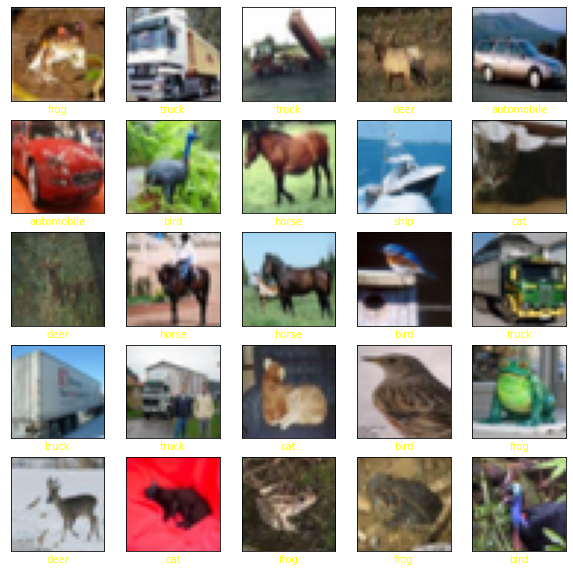

In [10]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize = (10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]], color = 'yellow')
plt.show()

In [11]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10))

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [15]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])
history = model.fit(train_images, train_labels, epochs = 10, validation_data = (test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.5237 - accuracy: 0.4441 - val_loss: 1.3197 - val_accuracy: 0.5214
Epoch 2/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.1569 - accuracy: 0.5903 - val_loss: 1.1360 - val_accuracy: 0.5884
Epoch 3/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.0140 - accuracy: 0.6426 - val_loss: 0.9869 - val_accuracy: 0.6561
Epoch 4/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.9114 - accuracy: 0.6786 - val_loss: 0.9359 - val_accuracy: 0.6731
Epoch 5/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.8403 - accuracy: 0.7058 - val_loss: 0.8817 - val_accuracy: 0.6901
Epoch 6/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7811 - accuracy: 0.7236 - val_loss: 0.8704 - val_accuracy: 0.6967
Epoch 7/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.7374 - accuracy: 0.7406 - val_loss: 0.8533 -

313/313 - 2s - loss: 0.8271 - accuracy: 0.7221


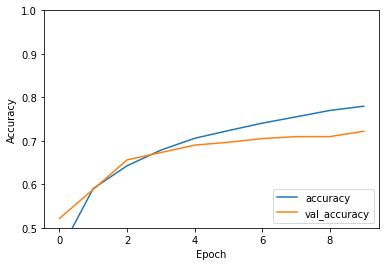

In [16]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc = 'lower right')
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)

In [17]:
print(test_loss, test_acc)

0.8270748853683472 0.722100019454956


In [18]:
t = tf.constant([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
pad = tf.constant([[1, 1], [1, 1]])
print(t)

tf.Tensor(
[[1 2 3]
 [4 5 6]
 [7 8 9]], shape=(3, 3), dtype=int32)


In [19]:
print(tf.pad(t, pad, 'CONSTANT'))

tf.Tensor(
[[0 0 0 0 0]
 [0 1 2 3 0]
 [0 4 5 6 0]
 [0 7 8 9 0]
 [0 0 0 0 0]], shape=(5, 5), dtype=int32)


Train: X=(60000, 28, 28), y=(60000,),
Test: X=(10000, 28, 28), y=(10000,)


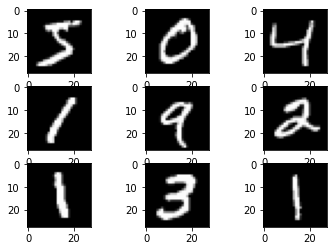

In [20]:
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot
(train_X, train_y), (test_X, test_y) = mnist.load_data()
print('Train: X=%s, y=%s,' % (train_X.shape, train_y.shape))
print('Test: X=%s, y=%s' % (test_X.shape, test_y.shape))
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_X[i], cmap = pyplot.get_cmap('gray'))
pyplot.show()

In [21]:
from tensorflow.keras.utils import to_categorical
# reshape dataset to have a single channel
train_X = train_X.reshape((train_X.shape[0], 28, 28, 1))
test_X = test_X.reshape((test_X.shape[0], 28, 28, 1))
# one hot encode target values
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

In [22]:
# Develop a Baseline Model
def load_dataset():
    # load_dataset
    (trainX, trainY), (testX, testY) = mnist.load_data()
    # reshape dataset to have a single channel
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

In [23]:
# prepare pixel data
def prep_pixels(train, test):   
    # convert from integers to float    
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

In [32]:
# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform', input_shape = (28, 28, 1)))
    model.add(MaxPooling2D(2, 2))
    model.add(Flatten())
    model.add(Dense(100, activation = 'relu', kernel_initializer = 'he_uniform'))
    model.add(Dense(10, activation = 'softmax'))

    # complie model
    opt = SGD(lr = 0.01, momentum = 0.9)
    model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [33]:
# evaluate a model using k-fold cross-validation
from sklearn.model_selection import KFold
def evaluate_model(dataX, dataY, n_folds = 5):
    scores, histories = list(), list()
    # prepare cross validation
    kfold = KFold(n_folds, shuffle = True, random_state = 1)
    # enumerate splits
    for train_ix, test_ix in kfold.split(dataX):
        # define model
        model = define_model()
        # select rows for train and test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        # fit model
        history = model.fit(trainX, trainY, epochs = 10, batch_size = 32, validation_data = (testX, testY), verbose = 0)
        # evaluate model
        _, acc = model.evaluate(testX, testY, verbose = 0)
        print('>%.3f' % (acc * 100.0))
        # stores scores
        scores.append(acc)
        histories.append(history)
    return scores, histories

In [34]:
# plot diagnostic learning curves
def summarize_diagnostics(histories):
    for i in range(len(histories)):
        # plot loss
        pyplot.subplot(2, 1, 1)
        pyplot.title('Cross Entropy Loss')
        pyplot.plot(histories[i].history['loss'], color = 'blue', label = 'train')
        pyplot.plot(histories[i].history['val_loss'], color = 'orange', label = 'test')
        # plot accuracy
        pyplot.subplot(2, 1, 2)
        pyplot.title('Classification Accuracy')
        pyplot.plot(histories[i].history['accuracy'], color = 'blue', label = 'train')
        pyplot.plot(histories[i].history['val_accuracy'], color = 'orange', label = 'test')
    pyplot.show()

In [35]:
# summarize model performance
def summarize_preformance(scores):
    # print summary
    print('Accuracy : mean = %.3f std = %.3f, n = %d' % (mean(scores) * 100, std(scores) * 100, len(scores)))
    # box and whisker plots of results
    pyplot.boxplot(scores)
    pyplot.show()

In [36]:
# run the test harness for evaluating a model
def run_test_harness():
    # load_dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testY)
    # evaluate model
    scores, histories = evaluate_model(trainX, trainY)
    # learning curves
    summarize_diagnostics(histories)
    # summarize estimated performance
    summarize_preformance(scores)

C:\Users\Bestc\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


>98.467
>98.733
>98.767
>98.800
>98.742


<ipython-input-34-29e5d9e730ef>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  pyplot.subplot(2, 1, 1)
<ipython-input-34-29e5d9e730ef>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  pyplot.subplot(2, 1, 2)


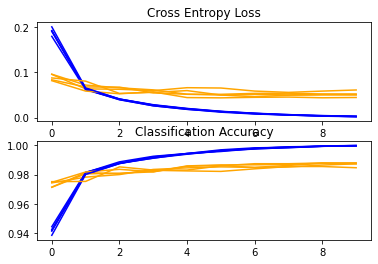

Accuracy : mean = 98.702 std = 0.120, n = 5


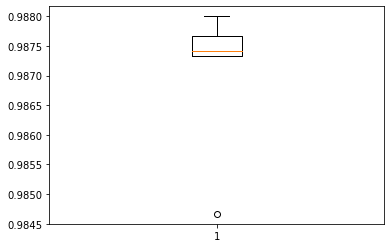

In [37]:
# complete example
from numpy import std
from numpy import mean
from matplotlib import pyplot
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import SGD

run_test_harness()